<a href="https://colab.research.google.com/github/santiagoed4/PredictionWell5832/blob/master/AD_batch_Formation_W5832.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML, display_html
import seaborn as sns
import datetime
import tensorflow as tf

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import xgboost

# Deep learning
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential 
from keras.callbacks import History 
from keras.layers import LSTM
from keras.layers import Dense

# Plot
import plotly.plotly as py
import plotly.graph_objs as go

# Train-test split
from sklearn.model_selection import train_test_split


# Hyperparameter tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

# Metrics

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

# Additionals

from pprint import pprint
from math import sqrt


Using TensorFlow backend.


In [ ]:
# spot check nonlinear algorithms
from numpy import load
from numpy import loadtxt
from numpy import nan
from numpy import isnan
from numpy import count_nonzero
from numpy import unique
from numpy import array
from sklearn.base import clone
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor



# Anomaly detection

from sklearn.ensemble import IsolationForest

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 45.3MB/s 


In [ ]:
link='https://drive.google.com/open?id=1ZS1yvvwbnrdxXKYSBbgNy7BO-gwCVicS'

In [ ]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1ZS1yvvwbnrdxXKYSBbgNy7BO-gwCVicS


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Well_58-32_processed_pason_log.csv')  
df1 = pd.read_csv('Well_58-32_processed_pason_log.csv')
# Dataset is now stored in a Pandas Dataframe
df1.head(3)

W0708 09:28:24.861960 140577490421632 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

,Depth(ft),Depth(m),ROP(1 ft),ROP(1 m),weight on bit (k-lbs),weight on bit (kg),Temp Out( degF),Temp Out( degC),Temp In(degF),Temp In(degC),Pit Total (bbls),Pit Total (m3),Pump Press (psi),Pump Press (KPa),Hookload (k-lbs),Hookload (kg),Surface Torque (psi),Surface Torque (KPa),Rotary Speed (rpm),Flow In (gal/min),Flow In(liters/min),Flow Out %,WH Pressure (psi),WH Pressure (KPa),H2S Floor,H2S Cellar,H2S Pits
0,85.18,25.96,56.80,17.31,0.0,0.0,93.49,34.16,90.87,32.71,274.83,43.69,463.72,3197.35,31.77,14408.16,8.93,61.57,151.09,1109.58,4200.22,101.61,-1230.69,-8485.61,-0.01,-0.03,0.31
1,86.18,26.27,61.14,18.63,0.0,0.0,93.52,34.18,90.83,32.68,274.83,43.69,459.53,3168.46,31.01,14063.49,8.93,61.57,151.09,1108.36,4195.60,101.70,-1230.69,-8485.61,-0.01,-0.04,0.31
2,87.23,26.59,18.58,5.66,0.0,0.0,94.25,34.58,90.91,32.73,273.80,43.53,454.57,3134.26,31.01,14063.49,9.01,62.12,61.54,1102.87,4174.82,96.81,-1230.69,-8485.61,-0.01,-0.03,0.30


In [ ]:
dfnew = df1.filter(['ROP(1 ft)', 'Depth(ft)', 'weight on bit (k-lbs)','Temp Out( degF)','Temp In(degF)','Pit Total (bbls)',
                    'Pump Press (psi)','Hookload (k-lbs)','Surface Torque (psi)','Rotary Speed (rpm)','Flow In (gal/min)','Flow Out %','WH Pressure (psi)','H2S Floor','H2S Cellar','H2S Pits'], axis=1)
dfnew.shape

(7311, 16)

In [ ]:
dfnew.loc[dfnew['ROP(1 ft)'].idxmax()]

ROP(1 ft)                2977.91
Depth(ft)                 361.85
weight on bit (k-lbs)       0.00
Temp Out( degF)           106.03
Temp In(degF)             105.05
Pit Total (bbls)          266.01
Pump Press (psi)          461.43
Hookload (k-lbs)           75.31
Surface Torque (psi)        6.80
Rotary Speed (rpm)         62.71
Flow In (gal/min)        1044.57
Flow Out %                 59.62
WH Pressure (psi)          -0.51
H2S Floor                   0.02
H2S Cellar                 -0.04
H2S Pits                    0.67
Name: 259, dtype: float64

In [ ]:
# Drop a row
dfnew=dfnew.drop(dfnew.index[0:400])

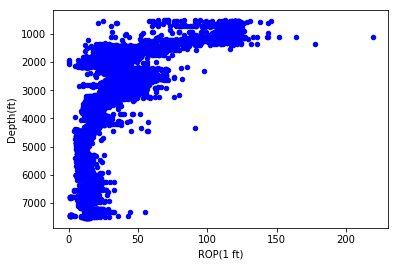

In [ ]:
dfnew.plot(kind='scatter',x='ROP(1 ft)',y='Depth(ft)', color='blue')
ay = plt.gca()
ay.set_ylim(ay.get_ylim()[::-1])
plt.show()

In [ ]:
data_X = dfnew[dfnew.columns.difference(['ROP(1 ft)'])]
data_y = dfnew[['ROP(1 ft)']]
print('Features shape:', data_X.shape)
print('Target shape', data_y.shape)

Features shape: (6911, 15)
Target shape (6911, 1)


In [ ]:
data_X1=np.array(data_X)
data_y1=np.array(data_y)
print('Features shape:', data_X1.shape)
print('Target shape', data_y1.shape)

Features shape: (6911, 15)
Target shape (6911, 1)


## Selection of data set

In [ ]:
X=data_X.iloc[3000:3500]
y=data_y.iloc[3000:3500]
print('Features shape:', X.shape)
print('Target shape', y.shape)

Features shape: (500, 15)
Target shape (500, 1)


In [ ]:
X1=np.array(X)
y1=np.array(y)
print('Features shape:', X1.shape)
print('Target shape', y1.shape)

Features shape: (500, 15)
Target shape (500, 1)


### Visualization of training, testing and forecasting data.
Forecasting was optanied using random forest algorithm. 

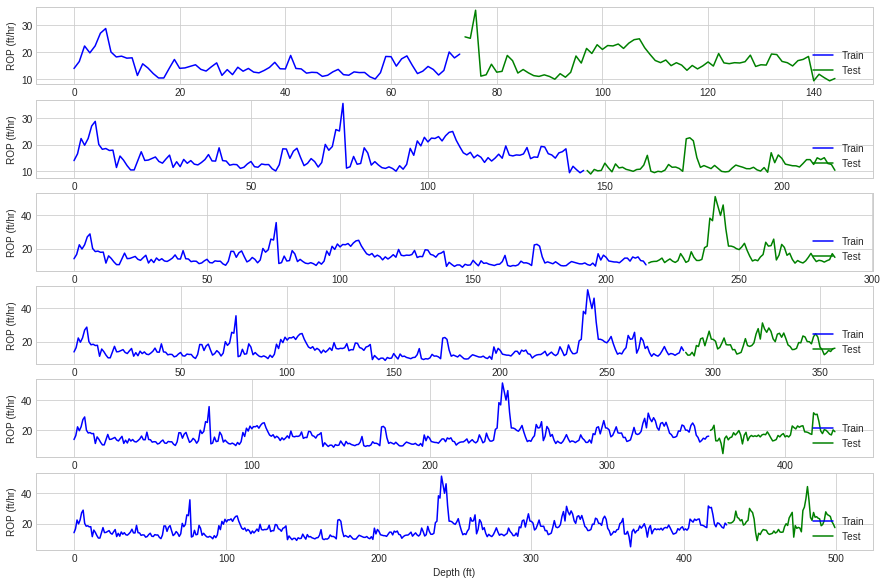

In [ ]:
# Visualization of training and testing data.
plt.style.use('seaborn-whitegrid')
splits = TimeSeriesSplit(n_splits=6)
fig, ax=plt.subplots(figsize=(15,10))
index = 1
for train_index, test_index in splits.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y1[train_index], y1[test_index]
    plt.subplot(610 + index)
    plt.plot(y_train, color='blue', label="Train")
    plt.plot([None for i in y_train] + [x for x in y_test], color='green', label="Test")
    plt.ylabel('ROP (ft/hr)'); plt.xlabel( 'Depth (ft)'); plt.legend(loc='lower right')
    index += 1
#plt.show()


Visualization of training and testing with Random forest.

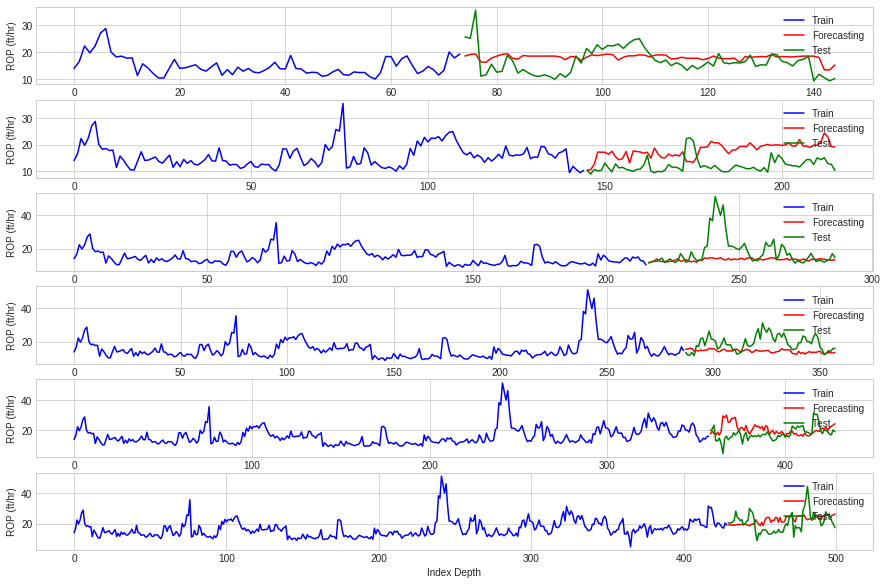

In [ ]:
# Forecasting result using Random forest.
splits = TimeSeriesSplit(n_splits=6)
fig, ax=plt.subplots(figsize=(15,10))
index = 1
for train_index, test_index in splits.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y1[train_index], y1[test_index]
    rf = RandomForestRegressor(random_state=42).fit(X_train, y_train) 
    predictions_rf = rf.predict(X_test)
    mae = round(mean_absolute_error(y_test, predictions_rf),2)
    plt.subplot(610 + index)
    plt.plot(y_train, color='blue', label="Train")
    plt.plot([None for i in y_train] + [x for x in predictions_rf], color='red', label="Forecasting")
    plt.plot([None for i in y_train] + [x for x in y_test], color='green', label="Test")
    plt.ylabel('ROP (ft/hr)'); plt.xlabel( 'Index Depth'); plt.legend(loc='upper right')
    index += 1



## Definition train and test set

In [ ]:
# Definition of Outlier
outliers_fraction=0.02

In [ ]:
# Defining the limints of training and testing
train_X_split=int(len(X)*0.70)
test_X_split=len(X)-train_X_split
train_y_split=int(len(y)*0.70)
test_y_split=len(y)-train_X_split

In [ ]:
# Splitting the data
train_X=X.iloc[0:train_X_split,:]
test_X=X.iloc[train_X_split:len(X),:]
train_y=y.iloc[0:train_y_split,:]
test_y=y.iloc[train_y_split:len(X),:]


print("x_train", train_X.shape)
print("x_test", test_X.shape)
print("y_train", train_y.shape)
print("y_test", test_y.shape)

x_train (350, 15)
x_test (150, 15)
y_train (350, 1)
y_test (150, 1)


## Train and test set normalization

In [ ]:
 # Nomalization
scalerX = StandardScaler().fit(train_X)
scalery = StandardScaler().fit(train_y)
train_X_s = scalerX.transform(train_X)
train_y_s = scalery.transform(train_y)
test_X_s = scalerX.transform(test_X)
test_y_s = scalery.transform(test_y)
# DataFrame
train_X_s=pd.DataFrame(train_X_s, index=train_X.index)
test_X_s=pd.DataFrame(test_X_s, index=test_X.index)
train_y_s=pd.DataFrame(train_y_s,  index=train_y.index )
test_y_s=pd.DataFrame(test_y_s, index=test_y.index)

### Anomaly detection with Random Forest

In [ ]:
# Training the model with Random Forest
t_ini_rf = datetime.datetime.now() #TIME
rf_ad = RandomForestRegressor(random_state=42).fit(train_X_s, train_y_s) 
# Obtain the prediction using machine learning model
predictions_rop_rf = rf_ad.predict(test_X_s)
# Rescale Normalization
predictions_rop_rf = scalery.inverse_transform(predictions_rop_rf, copy=None)
# Concatenate test data and predictions 
predictions_rop_rf = pd.DataFrame( {'ROP_Pred' : predictions_rop_rf}, index=test_y.index)
predictions_rf = pd.concat([test_y, predictions_rop_rf], axis=1)
#Calculate the difference between predictions and test set
predictions_rf['ratio']=(predictions_rf['ROP(1 ft)']/predictions_rf['ROP_Pred'])-1
predictions_rf['diff']=abs(predictions_rf['ROP(1 ft)']- predictions_rf['ROP_Pred'])
#Calculate error of predicitons
print('Mean absolute error:', mean_absolute_error(test_y, predictions_rop_rf))
print('Root mean squared error:', sqrt(mean_squared_error(test_y, predictions_rop_rf)))
print('R2:', r2_score(test_y, predictions_rop_rf) )
# Time
t_fin_rf = datetime.datetime.now() 
results_time_rf = (t_fin_rf - t_ini_rf).total_seconds() 
print('Run Time:', results_time_rf )

Mean absolute error: 5.2760333333333325
Root mean squared error: 6.418013095966694
R2: -0.35142884714310263
Run Time: 0.063866


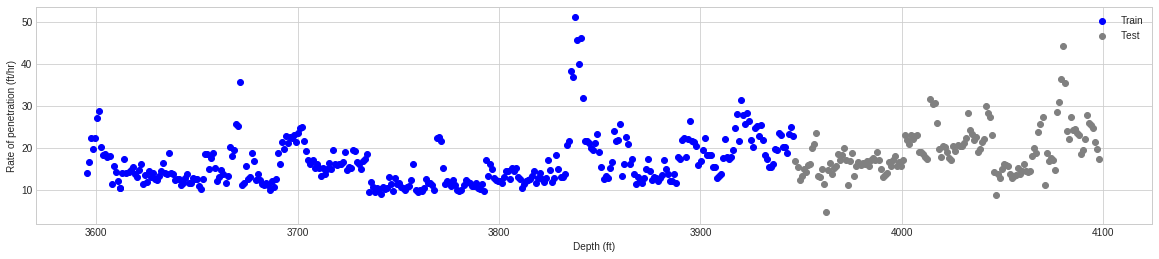

In [ ]:
# Visualization of Predictions
fig, ax=plt.subplots(figsize=(20,4))
ax.scatter(train_X['Depth(ft)'], train_y['ROP(1 ft)'], color='blue', label="Train")
ax.scatter(test_X['Depth(ft)'],predictions_rf['ROP(1 ft)'], color='gray', label="Test")
# ax.scatter(predictions_rf['ROP_Pred'], test_X['Depth(ft)'], color='green', label="Prediction")
#ay = plt.gca()
#ay.set_ylim(ay.get_ylim()[::-1])
plt.ylabel('Rate of penetration (ft/hr)'); plt.xlabel('Depth (ft)');
plt.legend(loc="best")
size_w = 14
plt.rc('font', size=size_w)          # controls default text sizes
plt.rc('axes', titlesize=size_w)     # fontsize of the axes title
plt.rc('axes', labelsize=size_w)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=size_w)    # fontsize of the tick labels
plt.rc('ytick', labelsize=size_w)    # fontsize of the tick labels
plt.rc('legend', fontsize=size_w)    # legend fontsize
plt.rc('figure', titlesize=size_w)  # fontsize of the figure title
plt.savefig('ad_batch.pdf',bbox_inches='tight')
plt.show()

In [ ]:
# Identificaction of Anomalies
# Select the most distant prediction/reality data points as anomalies
number_of_outliers = int(outliers_fraction*len(predictions_rf))
threshold = predictions_rf['diff'].nlargest(number_of_outliers).min()
# Data with anomaly label (test data part)
test_rf = (predictions_rf['diff'] >= threshold).astype(int)
# # Add anomaly label to the data
# anomaly_RF= pd.DataFrame({'anomalyRF' : test}, index=test_y.index)
predictions_rf['anomaly_RF']=test_rf
# Concatenate predictions with test set
total_data_rf = pd.concat([predictions_rf, test_X], axis=1)
# Counting number of anomalies identified
total=total_data_rf[total_data_rf['anomaly_RF']==1].count()
total

ROP(1 ft)                3
ROP_Pred                 3
ratio                    3
diff                     3
anomaly_RF               3
Depth(ft)                3
Flow In (gal/min)        3
Flow Out %               3
H2S Cellar               3
H2S Floor                3
H2S Pits                 3
Hookload (k-lbs)         3
Pit Total (bbls)         3
Pump Press (psi)         3
Rotary Speed (rpm)       3
Surface Torque (psi)     3
Temp In(degF)            3
Temp Out( degF)          3
WH Pressure (psi)        3
weight on bit (k-lbs)    3
dtype: int64

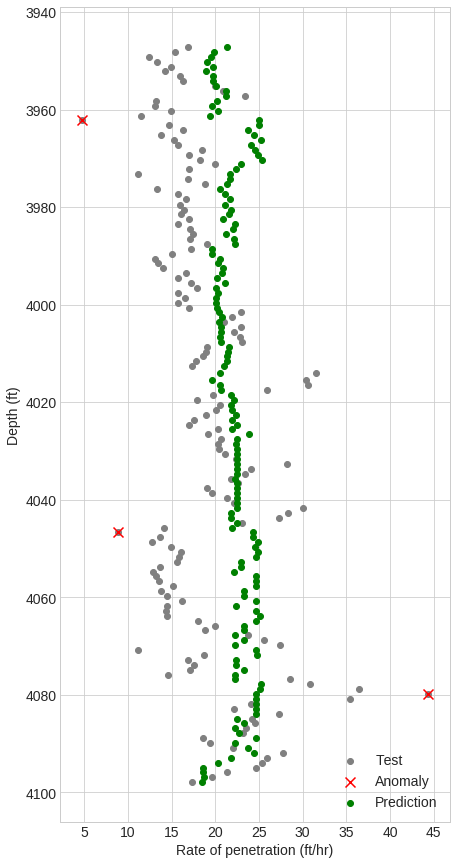

In [ ]:
# Visualization of anomaly 
fig, ax=plt.subplots(figsize=(7,15))
# Location of anomaly
a_rf=total_data_rf.loc[total_data_rf['anomaly_RF']==1,['Depth(ft)','ROP(1 ft)']] #anomaly
ax.scatter(total_data_rf['ROP(1 ft)'], total_data_rf['Depth(ft)'], color='grey', label="Test")
ax.scatter(a_rf['ROP(1 ft)'], a_rf['Depth(ft)'], color='red', marker='x', s=100, label="Anomaly") #anomaly
ax.scatter(total_data_rf['ROP_Pred'], total_data_rf['Depth(ft)'], color='green', label="Prediction")
ay = plt.gca()
ay.set_ylim(ay.get_ylim()[::-1])
plt.legend(loc='lower right')
plt.ylabel('Depth (ft)'); plt.xlabel('Rate of penetration (ft/hr)');
size_w = 14
plt.rc('font', size=size_w)          # controls default text sizes
plt.rc('axes', titlesize=size_w)     # fontsize of the axes title
plt.rc('axes', labelsize=size_w)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=size_w)    # fontsize of the tick labels
plt.rc('ytick', labelsize=size_w)    # fontsize of the tick labels
plt.rc('legend', fontsize=size_w)    # legend fontsize
plt.rc('figure', titlesize=size_w)  # fontsize of the figure title
plt.savefig('ad_batch_rf.pdf',bbox_inches='tight')
plt.show()

### Anomaly detection with XGBoost

In [ ]:
# Training the model with k-nearest regression
t_ini_xgb = datetime.datetime.now() #TIME
xgb_ad = xgboost.XGBRegressor().fit(train_X_s, train_y_s)
# Obtain the predictisvusing machine learning model (Normlaized)
predictions_rop_xgb = xgb_ad.predict(test_X_s)
# Rescale Normalization
predictions_rop_xgb = scalery.inverse_transform(predictions_rop_xgb, copy=None)

# Concatenate test data and predictions 
predictions_rop_xgb = pd.DataFrame(predictions_rop_xgb, index=test_y.index)
predictions_rop_xgb = predictions_rop_xgb.rename(columns = {0:"ROP_Pred"}) 
predictions_xgb = pd.concat([test_y, predictions_rop_xgb], axis=1)


# Calculate the difference between predictions and test set
predictions_xgb['ratio']=(predictions_xgb['ROP(1 ft)']/predictions_xgb['ROP_Pred'])-1
predictions_xgb['diff']=abs(predictions_xgb['ROP(1 ft)']- predictions_xgb['ROP_Pred'])
#Calculate error of predicitons
print('Mean absolute error:', mean_absolute_error(test_y, predictions_rop_xgb))
print('Root mean squared error:', sqrt(mean_squared_error(test_y, predictions_rop_xgb)))
print('R2:', r2_score(test_y, predictions_rop_xgb) )
# Time
t_fin_xgb = datetime.datetime.now() 
results_time_xgb = (t_fin_xgb - t_ini_xgb).total_seconds() 
print('Run Time:', results_time_xgb )

[09:28:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean absolute error: 5.204280246988931
Root mean squared error: 6.3033547803142165
R2: -0.30357340242406594
Run Time: 0.601524


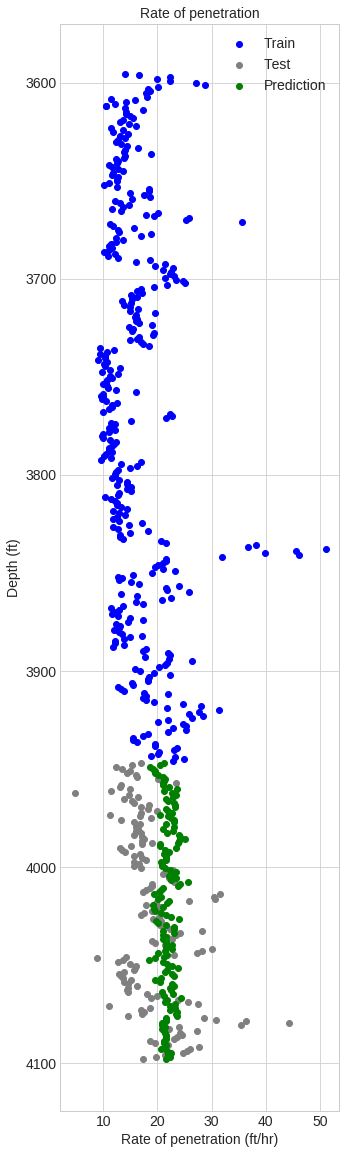

In [ ]:
# Visualization of Predictions
fig, ax=plt.subplots(figsize=(5,20))
ax.scatter(train_y['ROP(1 ft)'], train_X['Depth(ft)'], color='blue', label="Train")
ax.scatter(predictions_xgb['ROP(1 ft)'], test_X['Depth(ft)'], color='grey', label="Test")
ax.scatter(predictions_xgb['ROP_Pred'], test_X['Depth(ft)'], color='green', label="Prediction")
ay = plt.gca()
ay.set_ylim(ay.get_ylim()[::-1])
plt.ylabel('Depth (ft)'); plt.xlabel('Rate of penetration (ft/hr)'); plt.title('Rate of penetration');
plt.legend(loc="best")
plt.show()

In [ ]:
# Identificaction of Anomalies
# Select the most distant prediction/reality data points as anomalies
number_of_outliers_xgb = int(outliers_fraction*len(predictions_xgb))
threshold_xgb = predictions_xgb['diff'].nlargest(number_of_outliers_xgb).min()
# Data with anomaly label (test data part)
test_xgb = (predictions_xgb['diff'] >= threshold_xgb).astype(int)
# # Add anomaly label to the data
# anomaly_RF= pd.DataFrame({'anomalyRF' : test}, index=test_y.index)
predictions_xgb['anomaly_xgb']=test_xgb
# Concatenate predictions with test set
total_data_xgb = pd.concat([predictions_xgb, test_X], axis=1)
# Counting number of anomalies identified
total_xgb=total_data_xgb[total_data_xgb['anomaly_xgb']==1].count()

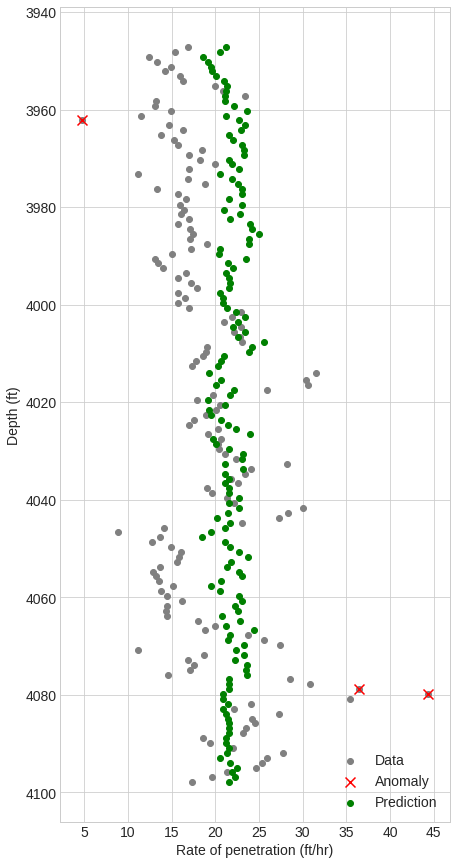

In [ ]:
# Visualization of anomaly 
fig, ax=plt.subplots(figsize=(7,15))
# Location of anomaly
a_xgb=total_data_rf.loc[total_data_xgb['anomaly_xgb']==1,['Depth(ft)','ROP(1 ft)']] #anomaly
ax.scatter(total_data_xgb['ROP(1 ft)'], total_data_xgb['Depth(ft)'], color='grey', label="Data") # OK
ax.scatter(a_xgb['ROP(1 ft)'], a_xgb['Depth(ft)'], color='red', marker = 'x', s=100, label="Anomaly") #anomaly
ax.scatter(total_data_xgb['ROP_Pred'], total_data_xgb['Depth(ft)'], color='green', label="Prediction") # OK
ay = plt.gca()
ay.set_ylim(ay.get_ylim()[::-1])
plt.legend(loc='lower right')
plt.ylabel('Depth (ft)'); plt.xlabel('Rate of penetration (ft/hr)'); 
size_w = 14
plt.rc('font', size=size_w)          # controls default text sizes
plt.rc('axes', titlesize=size_w)     # fontsize of the axes title
plt.rc('axes', labelsize=size_w)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=size_w)    # fontsize of the tick labels
plt.rc('ytick', labelsize=size_w)    # fontsize of the tick labels
plt.rc('legend', fontsize=size_w)    # legend fontsize
plt.rc('figure', titlesize=size_w)  # fontsize of the figure title
plt.savefig('ad_batch_xgb.pdf',bbox_inches='tight')
plt.show()

### Anomaly detection with K-nearest regression

In [ ]:
# Training the model with k-nearest regression
t_ini_knr = datetime.datetime.now() #TIME
knr_ad = KNeighborsRegressor(n_neighbors=7).fit(train_X_s, train_y_s)
# Obtain the predictisvusing machine learning model (Normlaized)
predictions_rop_knr = knr_ad.predict(test_X_s)
# Rescale Normalization
predictions_rop_knr = scalery.inverse_transform(predictions_rop_knr, copy=None)

# Concatenate test data and predictions 
predictions_rop_knr = pd.DataFrame(predictions_rop_knr, index=test_y.index)
predictions_rop_knr = predictions_rop_knr.rename(columns = {0:"ROP_Pred"}) 
predictions_knr = pd.concat([test_y, predictions_rop_knr], axis=1)


# Calculate the difference between predictions and test set
predictions_knr['ratio']=(predictions_knr['ROP(1 ft)']/predictions_knr['ROP_Pred'])-1
predictions_knr['diff']=abs(predictions_knr['ROP(1 ft)']- predictions_knr['ROP_Pred'])
#Calculate error of predicitons
print('Mean absolute error:', mean_absolute_error(test_y, predictions_rop_knr))
print('Root mean squared error:', sqrt(mean_squared_error(test_y, predictions_rop_knr)))
print('R2:', r2_score(test_y, predictions_rop_knr) )
# Time
t_fin_knr = datetime.datetime.now() 
results_time_knr = (t_fin_knr - t_ini_knr).total_seconds() 
print('Run Time:', results_time_knr )

Mean absolute error: 4.510057142857142
Root mean squared error: 5.8541247903699904
R2: -0.12438731897600475
Run Time: 0.017252


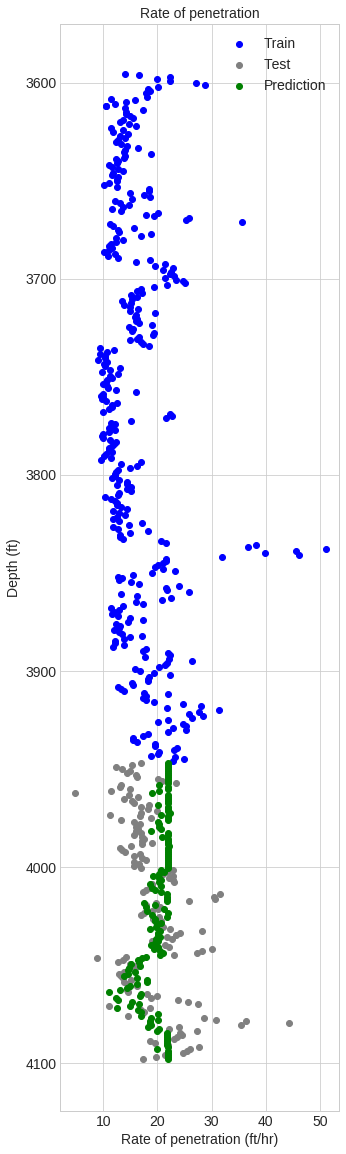

In [ ]:
# Visualization of Predictions
fig, ax=plt.subplots(figsize=(5,20))
ax.scatter(train_y['ROP(1 ft)'], train_X['Depth(ft)'], color='blue', label="Train")
ax.scatter(predictions_knr['ROP(1 ft)'], test_X['Depth(ft)'], color='grey', label="Test")
ax.scatter(predictions_knr['ROP_Pred'], test_X['Depth(ft)'], color='green', label="Prediction")
ay = plt.gca()
ay.set_ylim(ay.get_ylim()[::-1])
plt.ylabel('Depth (ft)'); plt.xlabel('Rate of penetration (ft/hr)'); plt.title('Rate of penetration');
plt.legend(loc="best")
plt.show()

In [ ]:
# Identificaction of Anomalies
# Select the most distant prediction/reality data points as anomalies
number_of_outliers_knr = int(outliers_fraction*len(predictions_knr))
threshold_knr = predictions_knr['diff'].nlargest(number_of_outliers_knr).min()
# Data with anomaly label (test data part)
test_knr = (predictions_knr['diff'] >= threshold_knr).astype(int)
# # Add anomaly label to the data
# anomaly_RF= pd.DataFrame({'anomalyRF' : test}, index=test_y.index)
predictions_knr['anomaly_KNR']=test_knr
# Concatenate predictions with test set
total_data_knr = pd.concat([predictions_knr, test_X], axis=1)
# Counting number of anomalies identified
total_knr=total_data_knr[total_data_knr['anomaly_KNR']==1].count()

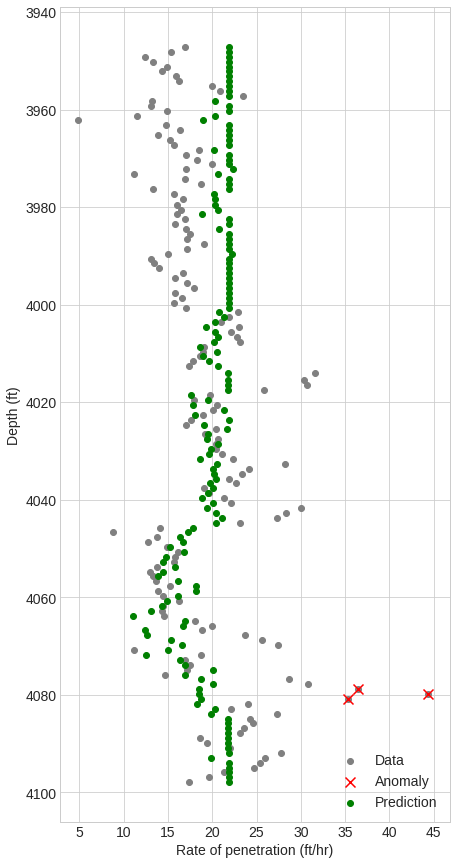

In [ ]:
# Visualization of anomaly 
fig, ax=plt.subplots(figsize=(7,15))
# Location of anomaly
a_knr=total_data_rf.loc[total_data_knr['anomaly_KNR']==1,['Depth(ft)','ROP(1 ft)']] #anomaly
ax.scatter(total_data_knr['ROP(1 ft)'], total_data_knr['Depth(ft)'], color='grey', label="Data") # OK
ax.scatter(a_knr['ROP(1 ft)'], a_knr['Depth(ft)'], color='red', marker = 'x', s=100, label="Anomaly") #anomaly
ax.scatter(total_data_knr['ROP_Pred'], total_data_knr['Depth(ft)'], color='green', label="Prediction") # OK
ay = plt.gca()
ay.set_ylim(ay.get_ylim()[::-1])
plt.legend(loc='lower right')
plt.ylabel('Depth (ft)'); plt.xlabel('Rate of penetration (ft/hr)'); 
size_w = 14
plt.rc('font', size=size_w)          # controls default text sizes
plt.rc('axes', titlesize=size_w)     # fontsize of the axes title
plt.rc('axes', labelsize=size_w)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=size_w)    # fontsize of the tick labels
plt.rc('ytick', labelsize=size_w)    # fontsize of the tick labels
plt.rc('legend', fontsize=size_w)    # legend fontsize
plt.rc('figure', titlesize=size_w)  # fontsize of the figure title
plt.savefig('ad_batch_kmeans.pdf',bbox_inches='tight')
plt.show()
plt.show()

### Anomaly detection with Support Vector Regression

In [ ]:
# Training the model with k-nearest regression
t_ini_sv = datetime.datetime.now() #TIME
sv_ad = SVR().fit(train_X_s, train_y_s)
# Obtain the prediction using machine learning model
predictions_rop_sv = sv_ad.predict(test_X_s)
# Rescale Normalization
predictions_rop_sv = scalery.inverse_transform(predictions_rop_sv, copy=None)
# Concatenate test data and predictions 
predictions_rop_sv = pd.DataFrame(predictions_rop_sv, index=test_y.index)
predictions_rop_sv = predictions_rop_sv.rename(columns = {0:"ROP_Pred"}) 
predictions_sv = pd.concat([test_y, predictions_rop_sv], axis=1)
# Calculate the difference between predictions and test set
predictions_sv['ratio']=(predictions_sv['ROP(1 ft)']/predictions_sv['ROP_Pred'])-1
predictions_sv['diff']=abs(predictions_sv['ROP(1 ft)']- predictions_sv['ROP_Pred'])
#Calculate error of predicitons
print('Mean absolute error:', mean_absolute_error(test_y, predictions_rop_sv))
print('Root mean squared error:', sqrt(mean_squared_error(test_y, predictions_rop_sv)))
print('R2:', r2_score(test_y, predictions_rop_sv) )
# Time
t_fin_sv = datetime.datetime.now() 
results_time_sv = (t_fin_sv - t_ini_sv).total_seconds() 
print('Run Time:', results_time_sv )

Mean absolute error: 3.9271131693684524
Root mean squared error: 5.770716807243023
R2: -0.09257563564230176
Run Time: 0.0262


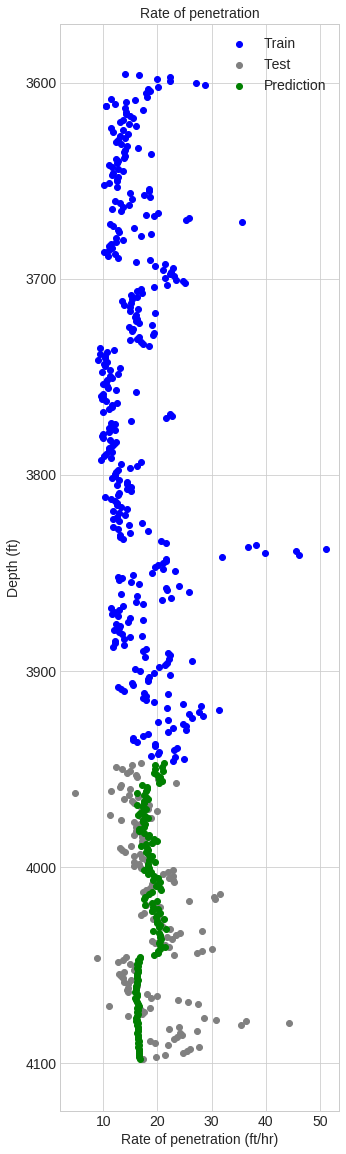

In [ ]:
# Visualization of Predictions
fig, ax=plt.subplots(figsize=(5,20))
ax.scatter(train_y['ROP(1 ft)'], train_X['Depth(ft)'], color='blue', label="Train")
ax.scatter(predictions_sv['ROP(1 ft)'], test_X['Depth(ft)'], color='grey', label="Test")
ax.scatter(predictions_sv['ROP_Pred'], test_X['Depth(ft)'], color='green', label="Prediction")
ay = plt.gca()
ay.set_ylim(ay.get_ylim()[::-1])
plt.ylabel('Depth (ft)'); plt.xlabel('Rate of penetration (ft/hr)'); plt.title('Rate of penetration');
plt.legend(loc="best")
plt.show()

In [ ]:
# Identificaction of Anomalies
# Select the most distant prediction/reality data points as anomalies
number_of_outliers_sv = int(outliers_fraction*len(predictions_sv))
threshold_sv = predictions_sv['diff'].nlargest(number_of_outliers_sv).min()
# Data with anomaly label (test data part)
test_sv = (predictions_sv['diff'] >= threshold_sv).astype(int)
# # Add anomaly label to the data
# anomaly_RF= pd.DataFrame({'anomalyRF' : test}, index=test_y.index)
predictions_sv['anomaly_sv']=test_sv
# Concatenate predictions with test set
total_data_sv = pd.concat([predictions_sv, test_X], axis=1)
# Counting number of anomalies identified
total_sv=total_data_sv[total_data_sv['anomaly_sv']==1].count()
total_sv

ROP(1 ft)                3
ROP_Pred                 3
ratio                    3
diff                     3
anomaly_sv               3
Depth(ft)                3
Flow In (gal/min)        3
Flow Out %               3
H2S Cellar               3
H2S Floor                3
H2S Pits                 3
Hookload (k-lbs)         3
Pit Total (bbls)         3
Pump Press (psi)         3
Rotary Speed (rpm)       3
Surface Torque (psi)     3
Temp In(degF)            3
Temp Out( degF)          3
WH Pressure (psi)        3
weight on bit (k-lbs)    3
dtype: int64

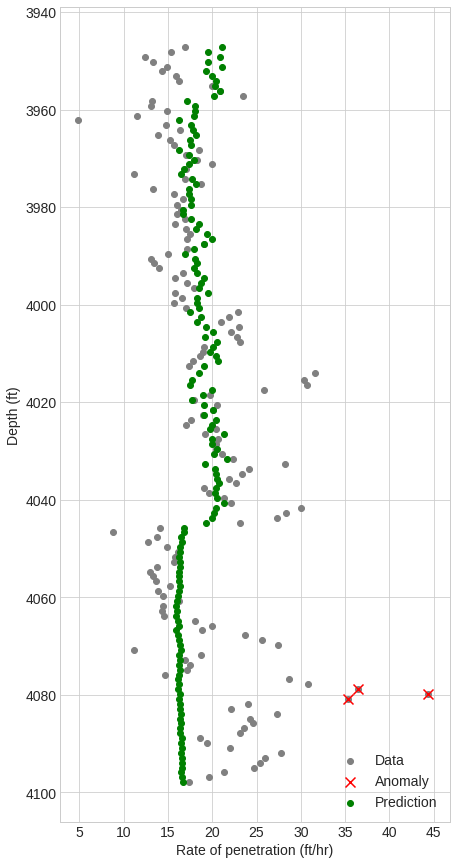

In [ ]:
# Visualization of anomaly 
fig, ax=plt.subplots(figsize=(7,15))
# Location of anomaly
a_sv=total_data_sv.loc[total_data_sv['anomaly_sv']==1,['Depth(ft)','ROP(1 ft)']] #anomaly
ax.scatter(total_data_sv['ROP(1 ft)'], total_data_sv['Depth(ft)'], color='grey', label="Data")
ax.scatter(a_sv['ROP(1 ft)'], a_sv['Depth(ft)'], color='red', marker = 'x', s=100, label="Anomaly") #anomaly
ax.scatter(total_data_sv['ROP_Pred'], total_data_sv['Depth(ft)'], color='green', label="Prediction")
ay = plt.gca()
ay.set_ylim(ay.get_ylim()[::-1])
plt.legend(loc='lower right')
plt.ylabel('Depth (ft)'); plt.xlabel('Rate of penetration (ft/hr)'); 
size_w = 14
plt.rc('font', size=size_w)          # controls default text sizes
plt.rc('axes', titlesize=size_w)     # fontsize of the axes title
plt.rc('axes', labelsize=size_w)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=size_w)    # fontsize of the tick labels
plt.rc('ytick', labelsize=size_w)    # fontsize of the tick labels
plt.rc('legend', fontsize=size_w)    # legend fontsize
plt.rc('figure', titlesize=size_w)  # fontsize of the figure title
plt.savefig('ad_batch_sv.pdf',bbox_inches='tight')
plt.show()

### Anomaly detection with Decision Tree

In [ ]:
# Training the model with k-nearest regression
t_ini_dt = datetime.datetime.now() #TIME
dt_ad = DecisionTreeRegressor().fit(train_X_s, train_y_s)
# Obtain the prediction using machine learning model (Normlaized)
predictions_rop_dt = dt_ad.predict(test_X_s)
# Rescale Normalization
predictions_rop_dt = scalery.inverse_transform(predictions_rop_dt, copy=None)

# Concatenate test data and predictions 
predictions_rop_dt = pd.DataFrame(predictions_rop_dt, index=test_y.index)
predictions_rop_dt = predictions_rop_dt.rename(columns = {0:"ROP_Pred"}) 
predictions_dt = pd.concat([test_y, predictions_rop_dt], axis=1)


# Calculate the difference between predictions and test set
predictions_dt['ratio']=(predictions_dt['ROP(1 ft)']/predictions_dt['ROP_Pred'])-1
predictions_dt['diff']=abs(predictions_dt['ROP(1 ft)']- predictions_dt['ROP_Pred'])
#Calculate error of predicitons
print('Mean absolute error:', mean_absolute_error(test_y, predictions_rop_dt))
print('Root mean squared error:', sqrt(mean_squared_error(test_y, predictions_rop_dt)))
print('R2:', r2_score(test_y, predictions_rop_dt) )
# Time
t_fin_dt = datetime.datetime.now() 
results_time_dt = (t_fin_dt - t_ini_dt).total_seconds() 
print('Run Time:', results_time_dt )


Mean absolute error: 4.439666666666667
Root mean squared error: 5.620841989121084
R2: -0.03656070375005416
Run Time: 0.017435


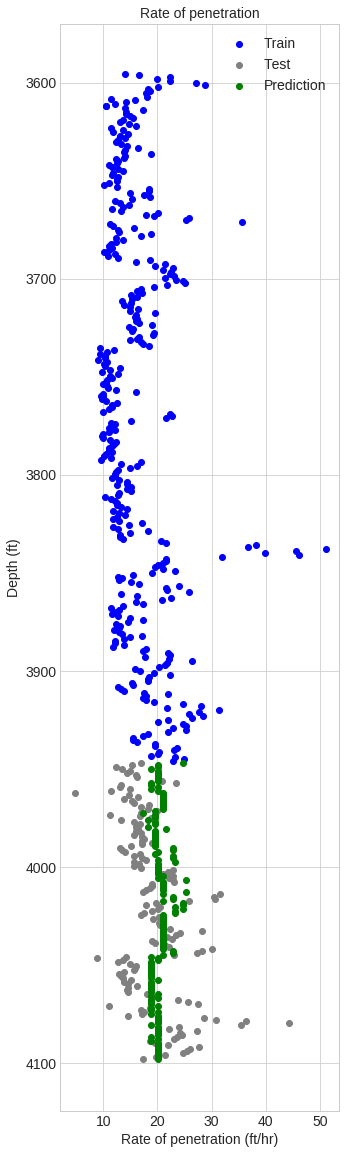

In [ ]:
# Visualization of Predictions
fig, ax=plt.subplots(figsize=(5,20))
ax.scatter(train_y['ROP(1 ft)'], train_X['Depth(ft)'], color='blue', label="Train")
ax.scatter(predictions_dt['ROP(1 ft)'], test_X['Depth(ft)'], color='grey', label="Test")
ax.scatter(predictions_dt['ROP_Pred'], test_X['Depth(ft)'], color='green', label="Prediction")
ay = plt.gca()
ay.set_ylim(ay.get_ylim()[::-1])
plt.ylabel('Depth (ft)'); plt.xlabel('Rate of penetration (ft/hr)'); plt.title('Rate of penetration');
plt.legend(loc="best")
plt.show()

In [ ]:
# Identificaction of Anomalies
# Select the most distant prediction/reality data points as anomalies
number_of_outliers_dt = int(outliers_fraction*len(predictions_dt))
threshold_dt = predictions_dt['diff'].nlargest(number_of_outliers_dt).min()
# Data with anomaly label (test data part)
test_dt = (predictions_dt['diff'] >= threshold_dt).astype(int)
# # Add anomaly label to the data
# anomaly_RF= pd.DataFrame({'anomalyRF' : test}, index=test_y.index)
predictions_dt['anomaly_dt']=test_dt
# Concatenate predictions with test set
total_data_dt = pd.concat([predictions_dt, test_X], axis=1)
# Counting number of anomalies identified
total_dt=total_data_dt[total_data_dt['anomaly_dt']==1].count()

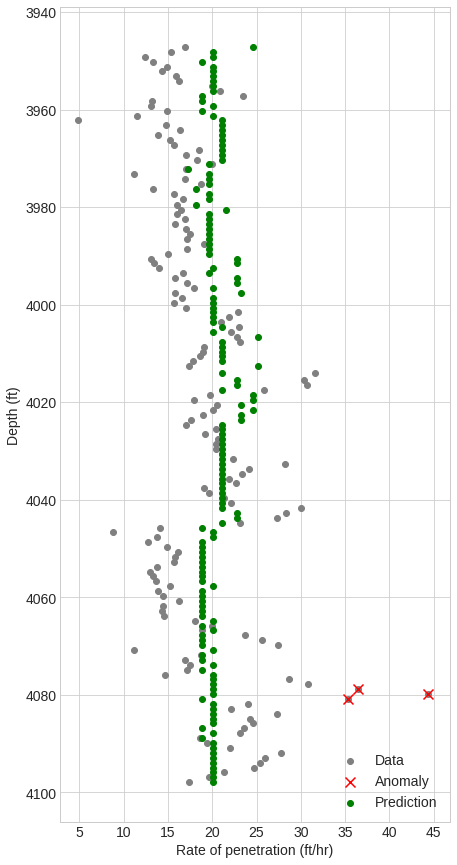

In [ ]:
# Visualization of anomaly 
fig, ax=plt.subplots(figsize=(7,15))
# Location of anomaly
a_dt=total_data_rf.loc[total_data_dt['anomaly_dt']==1,['Depth(ft)','ROP(1 ft)']] #anomaly
ax.scatter(total_data_dt['ROP(1 ft)'], total_data_dt['Depth(ft)'], color='grey', label="Data") # OK
ax.scatter(a_dt['ROP(1 ft)'], a_dt['Depth(ft)'], color='red', marker = 'x', s=100, label="Anomaly") #anomaly
ax.scatter(total_data_dt['ROP_Pred'], total_data_dt['Depth(ft)'], color='green', label="Prediction") # OK
ay = plt.gca()
ay.set_ylim(ay.get_ylim()[::-1])
plt.legend(loc='lower right')
plt.ylabel('Depth (ft)'); plt.xlabel('Rate of penetration (ft/hr)'); 
size_w = 14
plt.rc('font', size=size_w)          # controls default text sizes
plt.rc('axes', titlesize=size_w)     # fontsize of the axes title
plt.rc('axes', labelsize=size_w)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=size_w)    # fontsize of the tick labels
plt.rc('ytick', labelsize=size_w)    # fontsize of the tick labels
plt.rc('legend', fontsize=size_w)    # legend fontsize
plt.rc('figure', titlesize=size_w)  # fontsize of the figure title
plt.savefig('ad_batch_dt.pdf',bbox_inches='tight')

plt.show()

### Anomaly detection with Neural Networks

In [ ]:
# Training the model with k-nearest regression
t_ini_nn = datetime.datetime.now() #TIME
mlp_ad = MLPRegressor().fit(train_X_s, train_y_s)
# Obtain the prediction using machine learning model
predictions_rop_mlp = mlp_ad.predict(test_X_s)
# Rescale Normalization
predictions_rop_mlp = scalery.inverse_transform(predictions_rop_mlp, copy=None)
# Concatenate test data and predictions 
predictions_rop_mlp = pd.DataFrame(predictions_rop_mlp, index=test_y.index)
predictions_rop_mlp = predictions_rop_mlp.rename(columns = {0:"ROP_Pred"}) 
predictions_mlp = pd.concat([test_y, predictions_rop_mlp], axis=1)
# Calculate the difference between predictions and test set
predictions_mlp['ratio']=(predictions_mlp['ROP(1 ft)']/predictions_mlp['ROP_Pred'])-1
predictions_mlp['diff']=abs(predictions_mlp['ROP(1 ft)']- predictions_mlp['ROP_Pred'])
#Calculate error of predicitons
print('Mean absolute error:', mean_absolute_error(test_y, predictions_rop_mlp))
print('Root mean squared error:', sqrt(mean_squared_error(test_y, predictions_rop_mlp)))
print('R2:', r2_score(test_y, predictions_rop_mlp) )
# Time
t_fin_nn = datetime.datetime.now() 
results_time_nn = (t_fin_nn - t_ini_nn).total_seconds() 
print('Run Time:', results_time_nn )

Mean absolute error: 5.663021031248853
Root mean squared error: 7.65941536644881
R2: -0.9247894545271407
Run Time: 0.335269


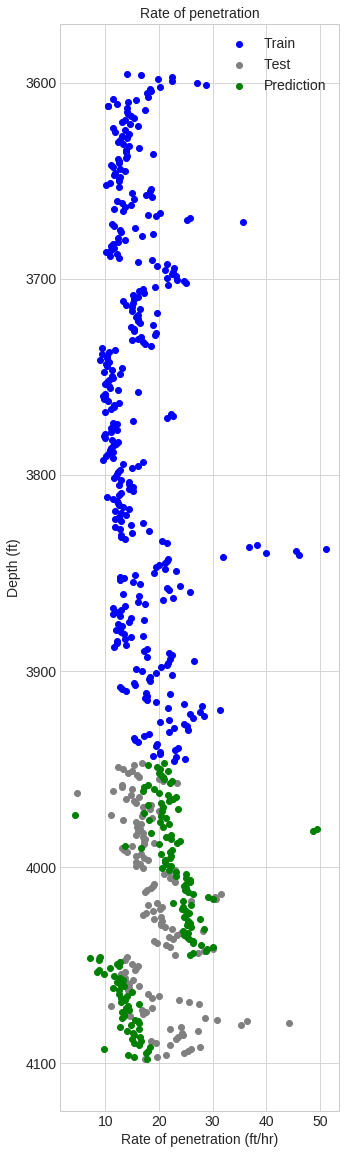

In [ ]:
# Visualization of Predictions
fig, ax=plt.subplots(figsize=(5,20))
ax.scatter(train_y['ROP(1 ft)'], train_X['Depth(ft)'], color='blue', label="Train")
ax.scatter(predictions_mlp['ROP(1 ft)'], test_X['Depth(ft)'], color='grey', label="Test")
ax.scatter(predictions_mlp['ROP_Pred'], test_X['Depth(ft)'], color='green', label="Prediction")
ay = plt.gca()
ay.set_ylim(ay.get_ylim()[::-1])
plt.ylabel('Depth (ft)'); plt.xlabel('Rate of penetration (ft/hr)'); plt.title('Rate of penetration');
plt.legend(loc="best")
plt.show()

In [ ]:
# Identificaction of Anomalies
# Select the most distant prediction/reality data points as anomalies
number_of_outliers_mlp = int(outliers_fraction*len(predictions_mlp))
threshold_mlp = predictions_mlp['diff'].nlargest(number_of_outliers_mlp).min()
# Data with anomaly label (test data part)
test_mlp = (predictions_mlp['diff'] >= threshold_mlp).astype(int)
# # Add anomaly label to the data
# anomaly_RF= pd.DataFrame({'anomalyRF' : test}, index=test_y.index)
predictions_mlp['anomaly_mlp']=test_mlp
# Concatenate predictions with test set
total_data_mlp = pd.concat([predictions_mlp, test_X], axis=1)
# Counting number of anomalies identified
total_mlp=total_data_mlp[total_data_mlp['anomaly_mlp']==1].count()
total_mlp

ROP(1 ft)                3
ROP_Pred                 3
ratio                    3
diff                     3
anomaly_mlp              3
Depth(ft)                3
Flow In (gal/min)        3
Flow Out %               3
H2S Cellar               3
H2S Floor                3
H2S Pits                 3
Hookload (k-lbs)         3
Pit Total (bbls)         3
Pump Press (psi)         3
Rotary Speed (rpm)       3
Surface Torque (psi)     3
Temp In(degF)            3
Temp Out( degF)          3
WH Pressure (psi)        3
weight on bit (k-lbs)    3
dtype: int64

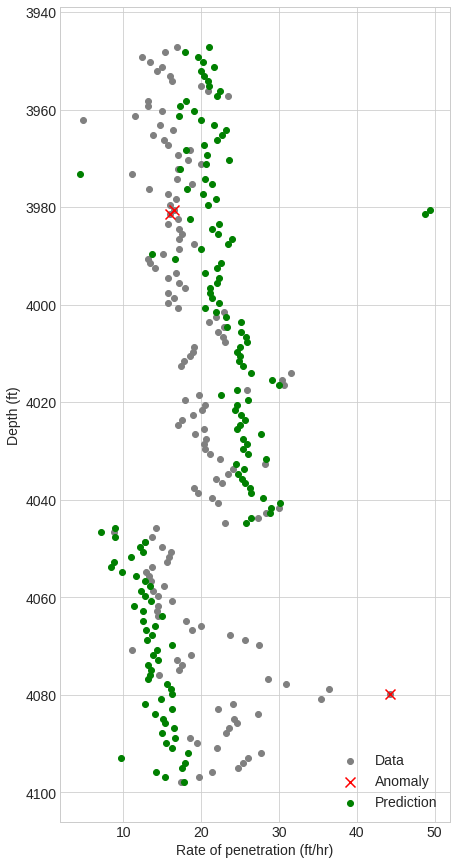

In [ ]:
# Visualization of anomaly 
fig, ax=plt.subplots(figsize=(7,15))
# Location of anomaly
a_mlp=total_data_mlp.loc[total_data_mlp['anomaly_mlp']==1,['Depth(ft)','ROP(1 ft)']] #anomaly
ax.scatter(total_data_mlp['ROP(1 ft)'], total_data_mlp['Depth(ft)'], color='grey', label="Data")
ax.scatter(a_mlp['ROP(1 ft)'], a_mlp['Depth(ft)'], color='red', marker = 'x', s=100, label="Anomaly") #anomaly
ax.scatter(total_data_mlp['ROP_Pred'], total_data_mlp['Depth(ft)'], color='green', label="Prediction")
ay = plt.gca()
ay.set_ylim(ay.get_ylim()[::-1])
plt.legend(loc='lower right')
plt.ylabel('Depth (ft)'); plt.xlabel('Rate of penetration (ft/hr)');
size_w = 14
plt.rc('font', size=size_w)          # controls default text sizes
plt.rc('axes', titlesize=size_w)     # fontsize of the axes title
plt.rc('axes', labelsize=size_w)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=size_w)    # fontsize of the tick labels
plt.rc('ytick', labelsize=size_w)    # fontsize of the tick labels
plt.rc('legend', fontsize=size_w)    # legend fontsize
plt.rc('figure', titlesize=size_w)  # fontsize of the figure title
plt.savefig('ad_batch_nn.pdf',bbox_inches='tight')
plt.show()